
<h1>Stock volatility prediction using GARCH(1,1)</h1>

In [1]:
import yfinance as yf
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display



In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

tickers = ['AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA']

ticker_drop_down = widgets.Dropdown(options=tickers, value='AAPL', description="Pick a ticker:")
start_date = widgets.DatePicker(description='Pick a start date:', disabled=False)
end_date = widgets.DatePicker(description='Pick an end date:', disabled=False)
output = widgets.Output()

selected_ticker = 'AAPL'
selected_start_date = None
selected_end_date = None

def update_output():
    with output:
        clear_output(wait=True)
        print(f"Selected Ticker: {selected_ticker}")
        print(f"Start Date: {selected_start_date}")
        print(f"End Date: {selected_end_date}")

def on_startDate_change(change):
    global selected_start_date
    selected_start_date = change['new']
    update_output()

def on_endDate_change(change):
    global selected_end_date
    selected_end_date = change['new']
    update_output()

def on_ticker_change(change):
    global selected_ticker
    selected_ticker = change['new']
    update_output()

start_date.observe(on_startDate_change, names='value')
end_date.observe(on_endDate_change, names='value')
ticker_drop_down.observe(on_ticker_change, names='value')

display(start_date, end_date, ticker_drop_down, output)

update_output()


DatePicker(value=None, description='Pick a start date:', step=1)

DatePicker(value=None, description='Pick an end date:', step=1)

Dropdown(description='Pick a ticker:', options=('AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA'), value='AAPL'…

Output()

In [36]:
stock_data = yf.download(selected_ticker , start =selected_start_date , end = selected_end_date)
stock_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-10,120.500000,123.870003,120.150002,123.239998,120.643433,81312200
2020-12-11,122.430000,122.760002,120.550003,122.410004,119.830940,86939800
2020-12-14,122.599998,123.349998,121.540001,121.779999,119.214188,79184500
2020-12-15,124.339996,127.900002,124.129997,127.879997,125.185677,157243700
2020-12-16,127.410004,128.369995,126.559998,127.809998,125.117149,98208600
...,...,...,...,...,...,...
2024-10-14,228.699997,231.729996,228.600006,231.300003,231.300003,39882100
2024-10-15,233.610001,237.490005,232.369995,233.850006,233.850006,64751400
2024-10-16,231.600006,232.119995,229.839996,231.779999,231.779999,34082200


In [20]:
stock_data.duplicated()

Date
2023-10-20    False
2023-10-23    False
2023-10-24    False
2023-10-25    False
2023-10-26    False
              ...  
2024-10-14    False
2024-10-15    False
2024-10-16    False
2024-10-17    False
2024-10-18    False
Length: 251, dtype: bool

In [21]:
stock_data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [22]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,208.155060,212.262590,203.905896,208.089642,208.089642,9.952221e+07
std,29.846179,30.294351,29.115454,29.735416,29.735416,3.082949e+07
min,140.559998,144.440002,138.800003,142.050003,142.050003,4.952680e+07
25%,181.900002,184.419998,176.959999,180.000000,180.000000,7.735860e+07
50%,210.000000,214.800003,205.770004,208.800003,208.800003,9.573710e+07
75%,234.114998,238.855003,231.344994,235.514999,235.514999,1.171180e+08
max,263.660004,271.000000,257.859985,263.260010,263.260010,2.438697e+08


In [23]:
stock_data['Close']

Date
2023-10-20    211.990005
2023-10-23    212.080002
2023-10-24    216.520004
2023-10-25    212.419998
2023-10-26    205.759995
                 ...    
2024-10-14    219.160004
2024-10-15    219.570007
2024-10-16    221.330002
2024-10-17    220.889999
2024-10-18    220.699997
Name: Close, Length: 251, dtype: float64

In [37]:
stock_data['Close'].pct_change() * 100

Date
2020-12-10         NaN
2020-12-11   -0.673478
2020-12-14   -0.514668
2020-12-15    5.009031
2020-12-16   -0.054739
                ...   
2024-10-14    1.647989
2024-10-15    1.102466
2024-10-16   -0.885186
2024-10-17    0.159632
2024-10-18    1.227657
Name: Close, Length: 970, dtype: float64

In [38]:
stock_data['Return'] = 100 * (stock_data['Close'].pct_change())

stock_data['Return'].head()





Date
2020-12-10         NaN
2020-12-11   -0.673478
2020-12-14   -0.514668
2020-12-15    5.009031
2020-12-16   -0.054739
Name: Return, dtype: float64

In [26]:
monthly_data = stock_data['Close'].resample('ME').last()

In [27]:
monthly_data.pct_change()

Date
2023-10-31         NaN
2023-11-30    0.195379
2023-12-31    0.034988
2024-01-31   -0.246257
2024-02-29    0.077901
2024-03-31   -0.129235
2024-04-30    0.042608
2024-05-31   -0.028372
2024-06-30    0.111186
2024-07-31    0.172781
2024-08-31   -0.077390
2024-09-30    0.221942
2024-10-31   -0.156442
Freq: ME, Name: Close, dtype: float64

In [28]:
stock_data['Return'].mean()

0.0744898160617503

In [29]:
stock_data['Return'].std()

3.427750147693404

Text(0.5, 1.0, 'Daily Returns Over Time')

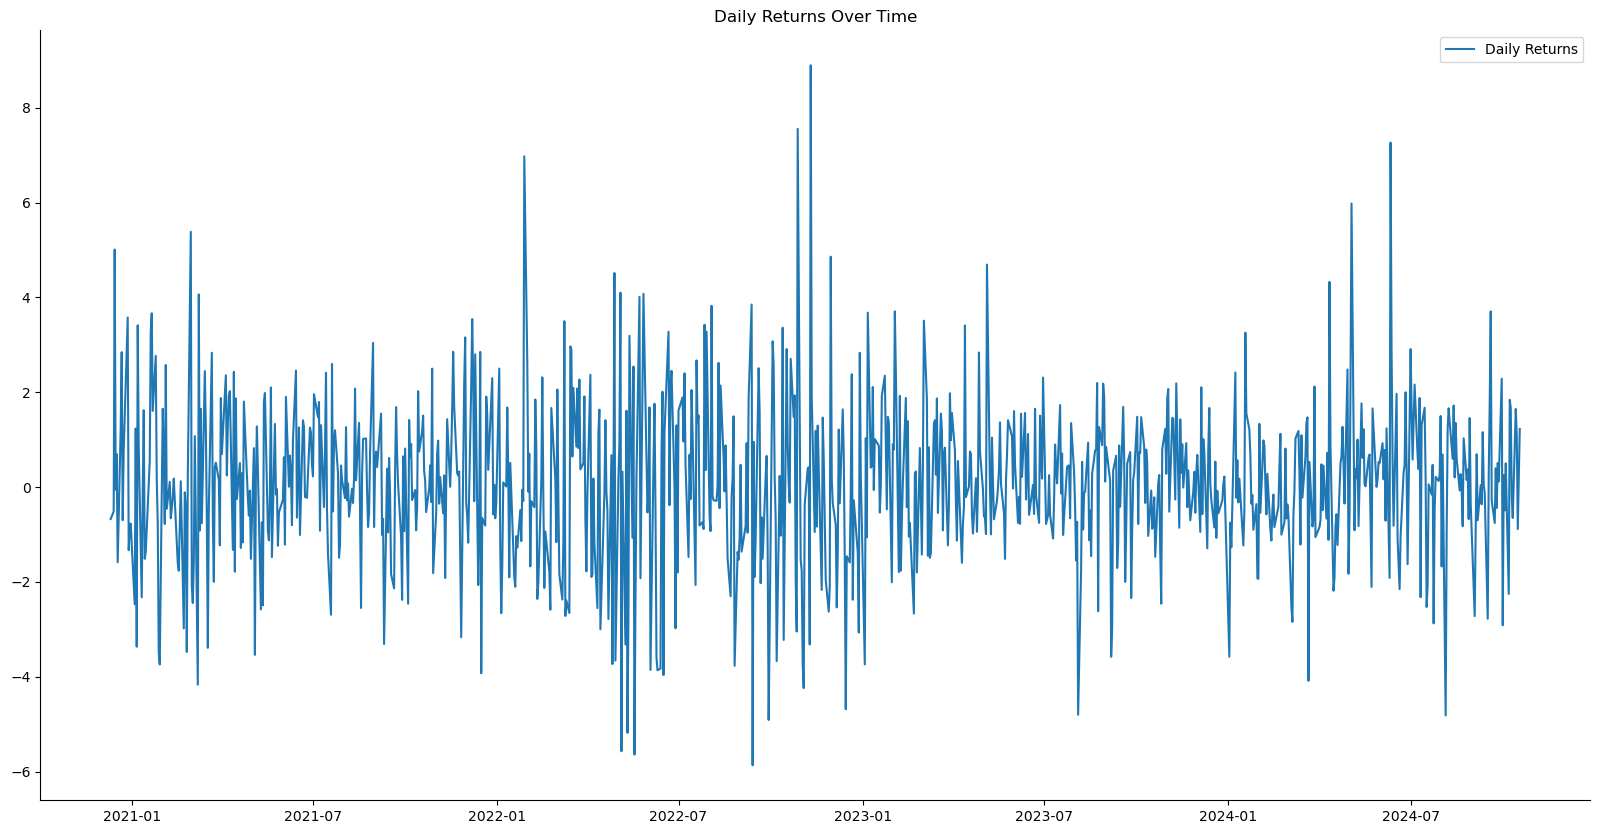

In [39]:
stock_data.dropna(inplace=True)

fig,ax = plt.subplots(figsize=(20,10))
ax.spines[['top','right']].set_visible(False)
plt.plot(stock_data['Return'], label = 'Daily Returns')
plt.legend(loc='upper right')
plt.title('Daily Returns Over Time')


In [40]:
daily_volatility = stock_data['Return'].std()

monthly_volatility = math.sqrt(21) * daily_volatility

annual_volatility = math.sqrt(252) * daily_volatility

from tabulate import tabulate

print(tabulate([[selected_ticker,daily_volatility,monthly_volatility,annual_volatility]],headers = ['Daily Volatility %', 'Monthly Volatility %', 'Annual Volatility %'],tablefmt = 'fancy_grid',stralign='center',numalign='center',floatfmt=".2f"))


╒══════╤══════════════════════╤════════════════════════╤═══════════════════════╕
│      │  Daily Volatility %  │  Monthly Volatility %  │  Annual Volatility %  │
╞══════╪══════════════════════╪════════════════════════╪═══════════════════════╡
│ AAPL │         1.71         │          7.83          │         27.12         │
╘══════╧══════════════════════╧════════════════════════╧═══════════════════════╛


In [41]:
from arch import arch_model
from arch.__future__ import reindexing

garch_model = arch_model(stock_data['Return'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')

gm_result = garch_model.fit(disp='off')
print(gm_result.params)

print('\n')

gm_forecast = gm_result.forecast(horizon = 365)
forecasted_variances = gm_forecast.variance[-1:]
print(forecasted_variances)

mu          0.108992
omega       0.036459
alpha[1]    0.033480
beta[1]     0.952809
Name: params, dtype: float64


               h.001    h.002    h.003     h.004     h.005     h.006  \
Date                                                                   
2024-10-18  2.087453  2.09529  2.10302  2.110644  2.118163  2.125579   

               h.007     h.008     h.009     h.010  ...     h.356     h.357  \
Date                                                ...                       
2024-10-18  2.132894  2.140108  2.147223  2.154241  ...  2.654787  2.654845   

               h.358     h.359     h.360    h.361     h.362     h.363  \
Date                                                                    
2024-10-18  2.654903  2.654959  2.655015  2.65507  2.655125  2.655178   

               h.364     h.365  
Date                            
2024-10-18  2.655231  2.655284  

[1 rows x 365 columns]


In [42]:
rolling_predictions = []
test_size = 365
for i in range(test_size):
 train = stock_data['Return'][:-(test_size-i)]
 model = arch_model(train, p=1, q=1)
 model_fit = model.fit(disp='off')
 pred = model_fit.forecast(horizon=1)
 rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
rolling_predictions = pd.Series(rolling_predictions, index=stock_data['Return'].index[-365:])

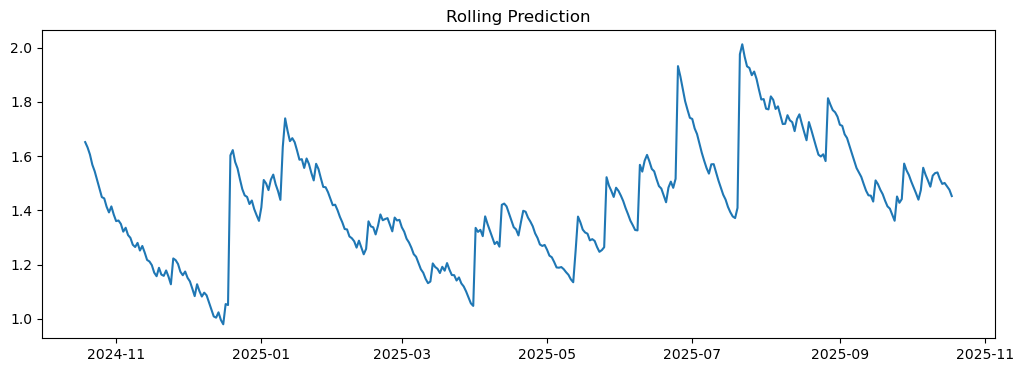

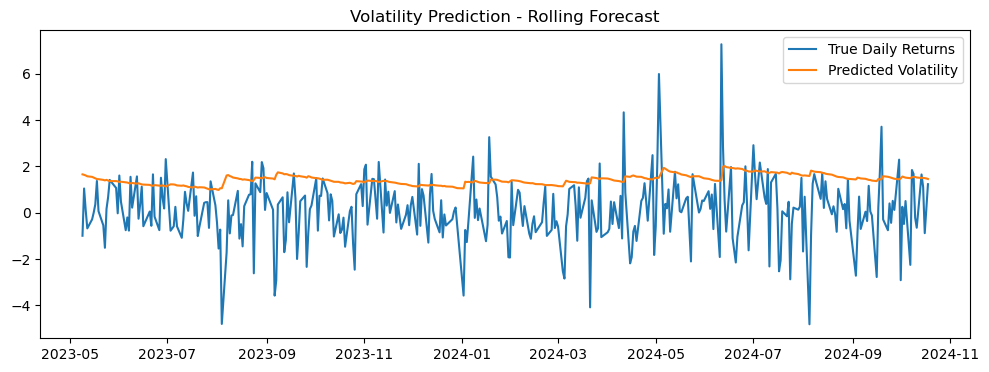

In [43]:

# Generate future dates for plotting
last_date = pd.to_datetime(stock_data.index[-1])
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, 365 + 1)]

# Plot the forecasted standard deviations
plt.figure(figsize=(12.3,4))
plt.plot(future_dates,rolling_predictions)
plt.title('Rolling Prediction')
plt.show()

plt.figure(figsize=(12,4))
plt.plot(stock_data['Return'][-365:])
plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast')
plt.legend(['True Daily Returns', 'Predicted Volatility'])
plt.show()
